In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

notes_list = {'S':1, 
                'R1':16/15,
                'R2':9/8,
                'R3':6/5 - 5e-2,
                'G1':6/5,
                'G2':81/64,
                'G3':4/3 - 5e-2,
                'M1':4/3,
                'M2':45/32,
                'P':3/2,
                'D1':8/5,
                'D2':27/16,
                'D3':1.69,
                'N1':16/9,
                'N2':15/8,
                'N3':1.9
}

In [2]:
data = pd.read_csv("test.csv")
data['contfreq'] = (data['freq']==data['freq'].shift(1)) & (data['freq']==data['freq'].shift(2))
data['freq'] = data.apply(lambda x: x['freq'] if x['contfreq'] else np.nan,axis=1)

# data = data[data['freq'].isnull()==False]

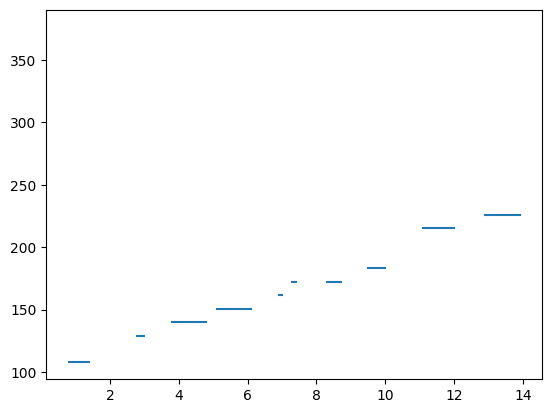

In [3]:
plt.plot(data['timestamp'], data['freq'])

In [4]:
freq_table = data['freq'].value_counts().reset_index().sort_values("freq")

In [5]:
base_freq = freq_table.iloc[0,0]
base_freq

107.666015625

In [6]:
freq_table['mult'] = freq_table['freq']/base_freq
rev_notes_list = {v:k for k,v in notes_list.items()}
freq_table['near'] = freq_table['mult'].apply(lambda x: rev_notes_list[sorted([(v,np.abs(v-x)) for v in notes_list.values()], key = lambda x: x[-1])[0][0]])
freq_table

,freq,count,mult,near
3,107.666016,7,1.0,S
9,118.432617,1,1.1,R2
6,129.199219,3,1.2,G1
7,139.965820,3,1.3,G3
0,150.732422,11,1.4,M2
8,161.499023,2,1.5,P
4,172.265625,7,1.6,D1
5,183.032227,6,1.7,D3
2,215.332031,10,2.0,N3
1,226.098633,11,2.1,N3
